In [1]:
import tensorflow
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequences in enumerate(sequences):
        results[i,sequences]=1.
        return results


In [4]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [5]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [6]:
train_labels.shape

(25000,)

In [7]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [8]:
from tensorflow import keras 
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(32, activation="sigmoid"),
 layers.Dense(32, activation="sigmoid"),
 layers.Dense(1, activation="sigmoid")
])

In [9]:
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
history = model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=52,
 validation_data=(x_val, y_val))

Epoch 1/20
289/289 [==============================] - 14s 43ms/step - loss: 0.6936 - accuracy: 0.5023 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 2/20
289/289 [==============================] - 4s 13ms/step - loss: 0.6938 - accuracy: 0.5027 - val_loss: 0.6941 - val_accuracy: 0.4947
Epoch 3/20
289/289 [==============================] - 4s 13ms/step - loss: 0.6939 - accuracy: 0.5021 - val_loss: 0.6942 - val_accuracy: 0.5053
Epoch 4/20
289/289 [==============================] - 4s 15ms/step - loss: 0.6942 - accuracy: 0.4927 - val_loss: 0.6973 - val_accuracy: 0.4947
Epoch 5/20
289/289 [==============================] - 4s 12ms/step - loss: 0.6942 - accuracy: 0.4926 - val_loss: 0.6949 - val_accuracy: 0.4947
Epoch 6/20
289/289 [==============================] - 3s 12ms/step - loss: 0.6940 - accuracy: 0.5035 - val_loss: 0.6931 - val_accuracy: 0.5053
Epoch 7/20
289/289 [==============================] - 4s 13ms/step - loss: 0.6939 - accuracy: 0.5022 - val_loss: 0.6932 - val_accuracy: 0.505

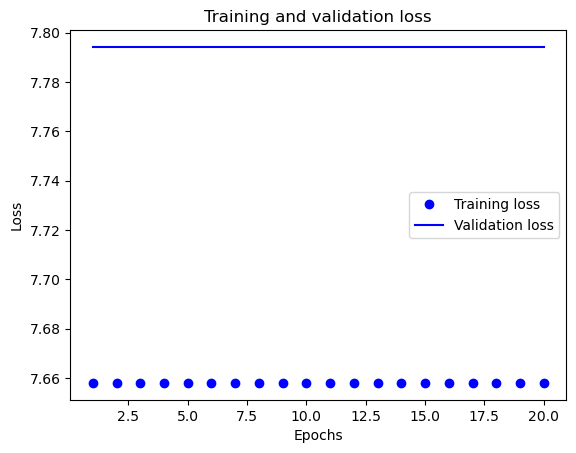

In [12]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()